In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import product

In [13]:
import pandas as pd
fashion_data = pd.read_excel(r'C:\Users\Vishnukant\Downloads\fashion_data.xlsx')
print(fashion_data)

      Pattern  Color1  Color2 Occasion ColorCombination
0       Solid     Red   White  Meeting      Red & White
1     Striped    Blue   Black   Casual     Blue & Black
2   Checkered   Green    Gray   Formal     Green & Gray
3      Floral  Yellow  Orange    Party  Yellow & Orange
4       Solid    Pink   Brown  Meeting     Pink & Brown
..        ...     ...     ...      ...              ...
71     Floral     Red    Gray    Party       Red & Gray
72      Solid  Orange   Black  Meeting   Orange & Black
73    Striped    Blue   Green   Casual     Blue & Green
74  Checkered  Yellow   White   Formal   Yellow & White
75     Floral    Pink   Brown    Party     Pink & Brown

[76 rows x 5 columns]


In [14]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pattern           76 non-null     object
 1   Color1            76 non-null     object
 2   Color2            76 non-null     object
 3   Occasion          76 non-null     object
 4   ColorCombination  76 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


In [17]:
description = fashion_data.describe()
print(description)

       Pattern Color1  Color2 Occasion ColorCombination
count       76     76      76       76               76
unique       4     11      11        4               55
top      Solid   Blue  Yellow  Meeting     Black & Gray
freq        19     10      10       19                3


In [24]:
#define feature x and target veriable y
x = fashion_data[['Pattern','Color1','Color2' ,'Occasion']]
y = fashion_data[['ColorCombination']]
print(x)
print("Features (X):")
print(x.head())
print("\nTarget variable (y):")
print(y.head())
     

      Pattern  Color1  Color2 Occasion
0       Solid     Red   White  Meeting
1     Striped    Blue   Black   Casual
2   Checkered   Green    Gray   Formal
3      Floral  Yellow  Orange    Party
4       Solid    Pink   Brown  Meeting
..        ...     ...     ...      ...
71     Floral     Red    Gray    Party
72      Solid  Orange   Black  Meeting
73    Striped    Blue   Green   Casual
74  Checkered  Yellow   White   Formal
75     Floral    Pink   Brown    Party

[76 rows x 4 columns]
Features (X):
     Pattern  Color1  Color2 Occasion
0      Solid     Red   White  Meeting
1    Striped    Blue   Black   Casual
2  Checkered   Green    Gray   Formal
3     Floral  Yellow  Orange    Party
4      Solid    Pink   Brown  Meeting

Target variable (y):
  ColorCombination
0      Red & White
1     Blue & Black
2     Green & Gray
3  Yellow & Orange
4     Pink & Brown


Data Visualization


In [25]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [27]:
color1_counts = fashion_data['Color1'].value_counts()
color2_counts = fashion_data['Color2'].value_counts()

Text(0, 0.5, 'Frequency')

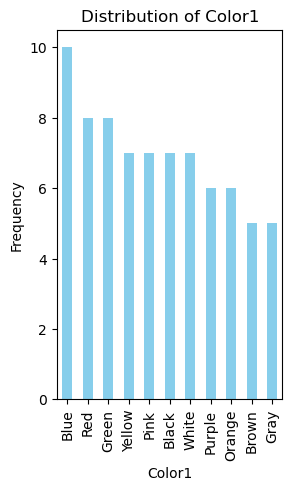

In [32]:
# Plot color1 distribution
plt.subplot(1, 2, 1)
color1_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Color1')
plt.xlabel('Color1')
plt.ylabel('Frequency')

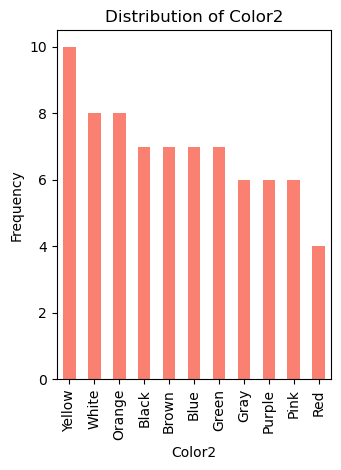

In [39]:

# Plot color2 distribution
plt.subplot(1, 2, 2)
color2_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Color2')
plt.xlabel('Color2')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

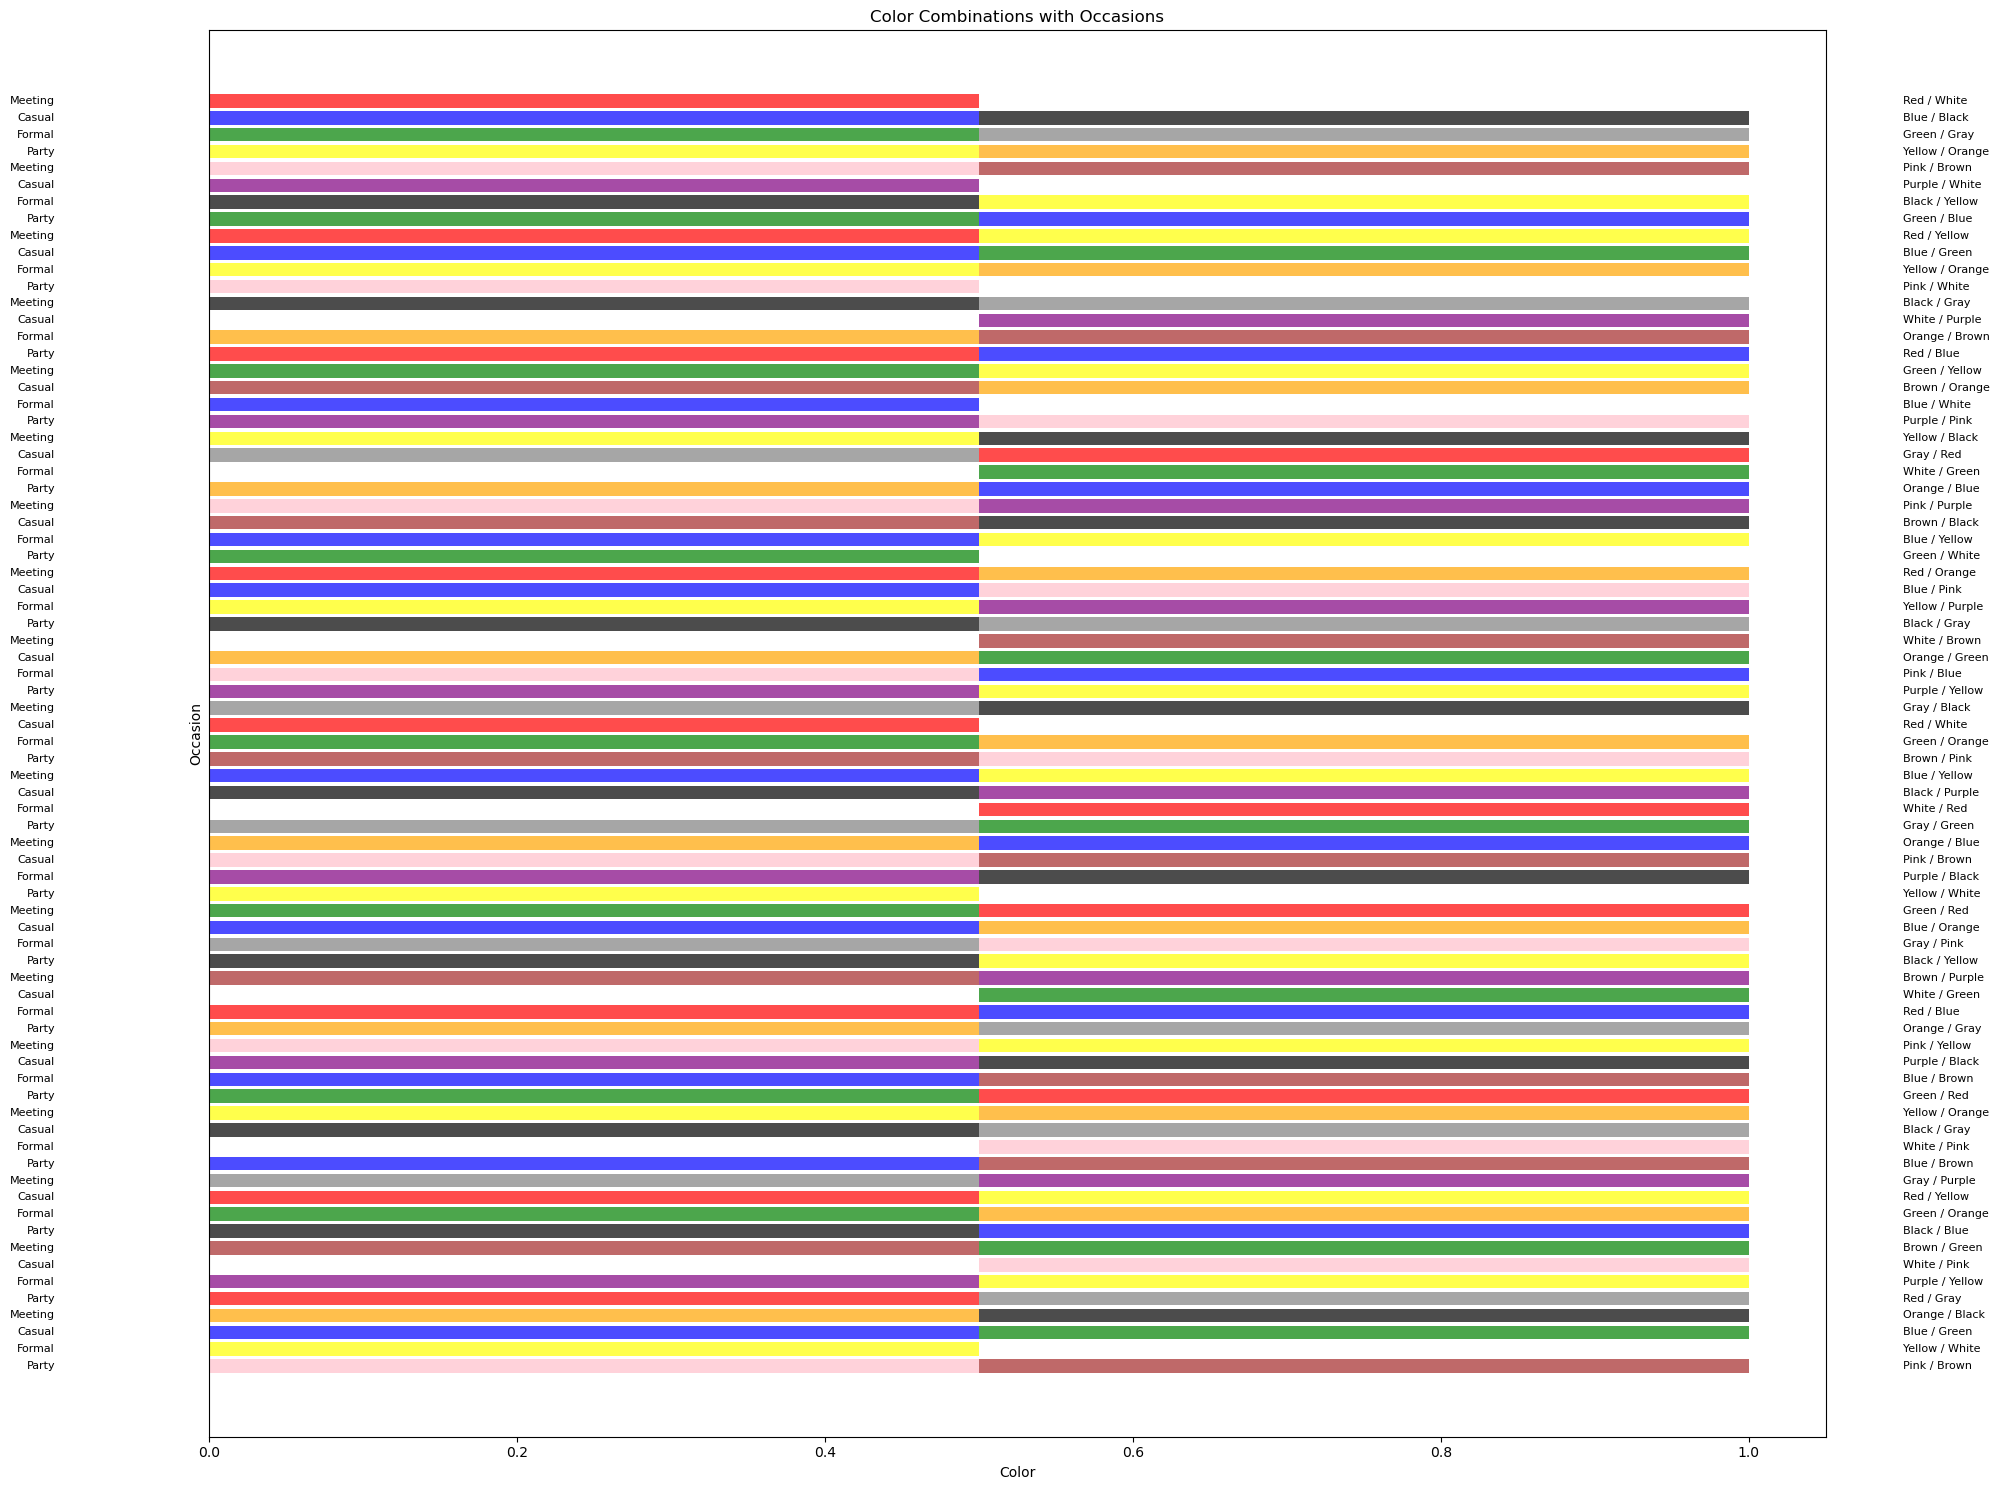

In [69]:
#Create a horizontal bar plot with half shade of color 1 and color 2 and write the occasion name on the bar
plt.figure(figsize=(20,15))
#calculate the position of bar
for i, (color1, color2, occasion) in enumerate(zip(x['Color1'], x['Color2'], x['Occasion'])):
    # Calculate the position of the bar
    y = len(x) - i - 1
 
# Plot the first half of the bar representing Color1
    plt.barh(y, 0.5, color=color1, alpha=0.7)
    # Plot the second half of the bar representing Color2
    plt.barh(y, 0.5, left=0.5, color=color2, alpha=0.7)
     # Write the occasion name on the bar (to the left side)
    plt.text(-0.1, y, occasion, ha='right', va='center', color='black', fontsize=8)

    # Display color information on the right side of the barrr
    plt.text(1.1, y, f"{color1} / {color2}", ha='left', va='center', color='black', fontsize=8)

# Remove y-axis ticks
plt.yticks([])

plt.title('Color Combinations with Occasions')
plt.xlabel('Color')
plt.ylabel('Occasion')
plt.tight_layout()
plt.show()


Data Pre Processing


# Separate features and target variable e
x = fashion_data[['Pattern', 'Color1', 'Color2', 'Occasion']]
y = fashion_data['ColorCombination']

Split data into training and training Set

In [92]:
x_encoded = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Train the model only on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(x_test)

# Evaluate model accuracy on the testing data
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.125


Predecting Color Combination for occasion

Result

In [102]:
# Given lists of colors and occasions in 
color1 = ['red', 'blue', 'green']
color2 = ['light', 'dark']

occasions = ['wedding', 'business meeting', 'casual outing']
color_combinations = {
    ('red', 'light'): 'wedding',
    ('red', 'dark'): 'business meeting',
    ('blue', 'light'): 'casual outing',
    ('blue', 'dark'): 'casual outing',
    ('green', 'light'): 'business meeting',
    ('green', 'dark'): 'casual outing'
}
# Generate all possible combinations of colors
all_combinations = list(product(color1, color2))

# Predict occasions for each combination
for combination in all_combinations:
    color_combo = tuple(combination)
    if color_combo in color_combinations:
        occasion = color_combinations[color_combo]
        print(f"Colors: {color_combo}, Occasion: {occasion}")
    else:
        print(f"No occasion found for colors: {color_combo}")

Colors: ('red', 'light'), Occasion: wedding
Colors: ('red', 'dark'), Occasion: business meeting
Colors: ('blue', 'light'), Occasion: casual outing
Colors: ('blue', 'dark'), Occasion: casual outing
Colors: ('green', 'light'), Occasion: business meeting
Colors: ('green', 'dark'), Occasion: casual outing
